In [94]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [95]:
dna_meth = pd.read_csv("data/G7_colon_dna-meth.csv")
gene_expr = pd.read_csv("data/G7_colon_gene-expr.csv")

In [96]:
dna_meth.head()

,Unnamed: 0,Label,cg00002719,cg00020191,cg00021558,cg00024472,cg00058329,cg00060320,cg00063174,cg00063471,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
0,TCGA.3L.AA1B.01,Primary Tumor,0.425515340169044,0.436703357667433,0.470790835061903,0.489124271628047,0.52084774284631,0.564841014790932,0.0279196512867719,0.364866162056129,...,0.0175844325128677,0.0151095416768205,0.578529566235385,0.473453344100523,0.963401647102576,0.0478745323421775,0.961193988604392,0.508204307398672,0.0367115381427066,0.094152880646695
1,TCGA.4N.A93T.01,Primary Tumor,0.672130323413734,0.10626979613926,0.155839750404878,0.543090262188981,0.844421666654906,0.278042773526397,0.038138739195241,0.0535587690237532,...,0.455199169881816,0.96691708815921,0.488997628813778,0.0228005843469781,0.966083202332779,0.54798009148647,0.937287272777887,0.76294459961883,0.0367386049916784,0.0868508376468331
2,TCGA.4T.AA8H.01,Primary Tumor,0.74826836671075,0.164049566424512,0.311851441452116,0.569770878584933,0.807615144430919,0.0932031942846083,0.766712393956006,0.750499791411135,...,0.376559610507894,0.967752730410444,0.924706926203451,0.0172364995369275,0.413865669139588,0.0462664208266275,0.023421491544841,0.971496749172563,0.91663819497936,0.447129471461788
3,TCGA.5M.AAT4.01,Primary Tumor,0.734855490246631,0.305086047063093,0.124479170550199,0.606617002404142,0.643406060721726,0.60194009226437,0.558618823480556,0.517065386433308,...,0.967591626967765,0.967524296057652,0.908704835610158,0.248435252790084,0.0202388378005258,0.692241160044453,0.952129112317728,0.973124487108514,0.940749914600556,0.241966797160835
4,TCGA.5M.AAT5.01,Primary Tumor,0.78461624539004,0.0988487165683449,0.0629133879972525,0.0125516192807167,0.121437726286756,0.224107517298674,0.521053896342493,0.0323537249694464,...,0.480225335427129,0.386619383681699,0.844464556390964,0.222553852682295,0.178523603022226,0.0298799705428059,0.478118228166797,0.970486035475278,0.519333524911576,0.0538768792072756


In [97]:
dna_meth["Label"].describe()

count               333
unique                2
top       Primary Tumor
freq                295
Name: Label, dtype: object

In [98]:
gene_expr.head()

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.3L.AA1B.01,Primary Tumor,0.5174,18.0851,15.764,144.4004,774.6615,0.0,441.9729,1.9342,...,71.0832,461.3153,1105.4159,3.3849,543.0368,6259.1876,1358.3172,798.3559,13.0561,0.0
1,TCGA.4N.A93T.01,Primary Tumor,0.0,4.4315,4.2767,142.6609,1185.2927,0.0,522.0126,0.4838,...,39.671,366.715,1149.492,0.4838,290.7596,4653.1205,1220.1258,333.8171,1.9352,0.9676
2,TCGA.4T.AA8H.01,Primary Tumor,0.0,9.8995,11.3032,143.1987,888.3202,0.0,288.0643,2.9245,...,31.4385,349.4791,1083.5313,0.0,669.713,4460.6105,3002.0106,530.0676,2.1934,0.0
3,TCGA.5M.AAT4.01,Primary Tumor,0.0,7.9174,18.7608,146.1876,1280.5508,0.0,379.5181,2.1515,...,54.6472,542.1687,1374.3546,0.4303,445.3528,4190.1893,1093.3735,574.4406,6.4544,0.4303
4,TCGA.5M.AAT5.01,Primary Tumor,0.0,12.2565,20.8826,262.5109,1299.8431,0.0,279.4564,0.9892,...,29.1822,428.3349,1240.9841,3.4623,550.5043,3878.2609,1016.4298,413.0019,17.3115,0.0


In [99]:
gene_expr["Label"].describe()

count               326
unique                2
top       Primary Tumor
freq                285
Name: Label, dtype: object

In [100]:
def score(pred, true):
    recall = recall_score(true, pred, pos_label="Primary Tumor")
    precision = precision_score(true, pred, pos_label="Primary Tumor")
    accuracy = accuracy_score(true, pred)

    return {"recall": recall, "precision": precision, "accuracy": accuracy}

In [101]:
meth_features = dna_meth.columns[2:]

Y_meth = dna_meth["Label"]
X_meth = dna_meth[meth_features]

X_meth_train, X_meth_test, Y_meth_train, Y_meth_test = train_test_split(X_meth, Y_meth, test_size=0.2, random_state=3141)

{'recall': 0.9841269841269841, 'precision': 1.0, 'accuracy': 0.9850746268656716}


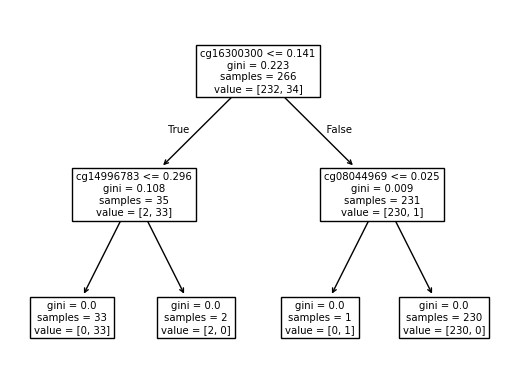

In [102]:
meth_tree = DecisionTreeClassifier()
meth_tree.fit(X_meth_train, Y_meth_train)

meth_prediction = meth_tree.predict(X_meth_test)
print(score(meth_prediction, Y_meth_test))

tree.plot_tree(meth_tree, feature_names=meth_features)
plt.show()

In [103]:
gene_features = gene_expr.columns[2:]

Y_gene = gene_expr["Label"]
X_gene = gene_expr[gene_features]

X_gene_train, X_gene_test, Y_gene_train, Y_gene_test = train_test_split(X_gene, Y_gene, test_size=0.2, random_state=3141)

{'recall': 1.0, 'precision': 0.9836065573770492, 'accuracy': 0.9848484848484849}


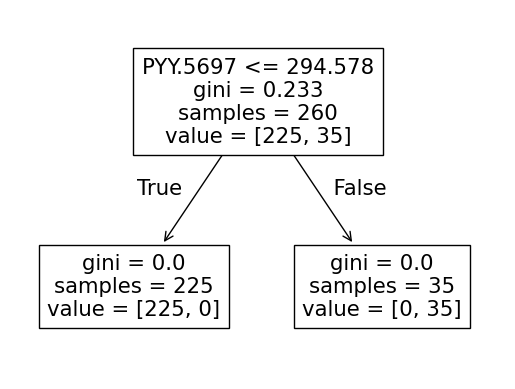

In [104]:
gene_tree = DecisionTreeClassifier()
gene_tree.fit(X_gene_train, Y_gene_train)

gene_prediction = gene_tree.predict(X_gene_test)
print(score(gene_prediction, Y_gene_test))

tree.plot_tree(gene_tree, feature_names=gene_features)
plt.show()